In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from math import log
import pandas as pd
import time
from sys import getsizeof as ram
import networkx as nx
import squarify

In [9]:
start = 0
def dtn():
    """Sets start variable to the current date and time
    
    IMPORTANT: must define global start variable before using"""
    global start
    start = dt.now()
    
def end():
    """Using in conjunction with dtn() function, returns the time taken between dtn() and this function being called"""
    return str(dt.now()-start)

def gen_end():
    """Generic function that gives a string telling how long it has been since dtn() was called. Can be used instead of end()"""
    stop = end()
    print("Completed in :"+stop)

In [3]:
try:
    print("Looking for local copy of data...")
    dtn()
    df_a = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/Authentication data.gz",compression="gzip",index_col=0)
    stop = end()
    print("Data fetched locally in "+stop)
except OSError as e:
    if e.errno == 2:
        print("No Local data found. Importing from the web.")
        dtn()
        df_a = pd.read_csv("https://www.dropbox.com/s/c065rcq72abzm0s/Authentication_data.gz?dl=1",compression="gzip",index_col=0)
        stop = end()
        print("Data fetched from web in "+stop)
    else:
        print(e)

Looking for local copy of data...


G:\Programs\Anaconda\envs\det\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Data fetched locally in 0:00:20.987323


In [4]:
df_a.head()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
0,User035855,Comp808475,Comp081330,TGS,0,17.0
1,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350.0
2,User762066,Comp306129,ActiveDirectory,TGS,0,22.0
3,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35.0
4,User043263,Comp883307,Comp384394,TGS,0,2.0


In [5]:
df_a["Authent Type"].unique()

array(['TGS', 'NetworkLogon', 'TGT', 'WorkstationLock',
       'WorkstationUnlock', 'ScreensaverInvoked', 'InteractiveLogon',
       'ScreensaverDismissed', 'Service', 'Batch', 'CachedInteractive',
       'RemoteInteractive', 'CachedRemoteInteractive'], dtype=object)

In [6]:
df_a.tail()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
80187,Comp955366$,Comp955366,ActiveDirectory,TGS,0,23.0
80188,Comp589380$,Comp589380,ActiveDirectory,TGT,0,37.0
80189,Comp629793$,Comp629793,ActiveDirectory,TGS,0,21.0
80190,User104387,Comp917362,ActiveDirectory,NetworkLogon,0,387.0
80191,User992201,Comp487027,Comp915658,NetworkLogon,0,1.0


In [7]:
x = ["UserName","SrcDevice","DstDevice","Authent Type"]
counts = []
for i in x:
    z = df_a.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts.append(z)

FileNotFoundError: [Errno 2] No such file or directory: './plots/auth_counts/UserNames_Head_150.png'

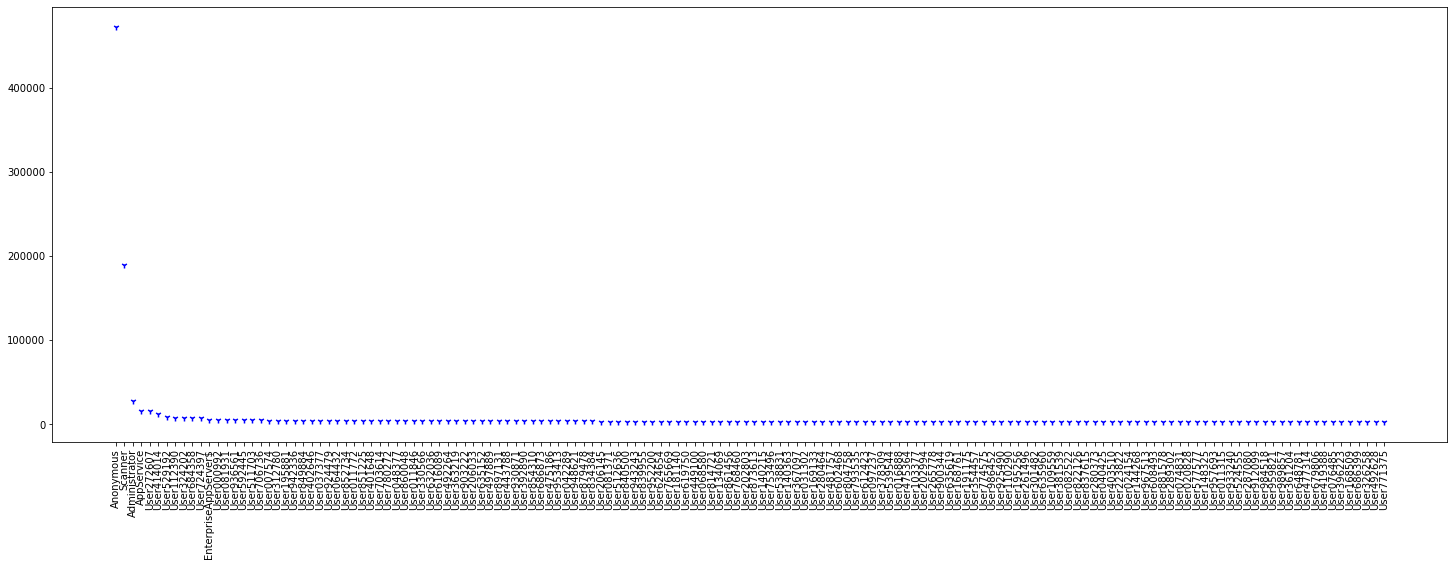

In [10]:
x=counts[0].loc[:,"UserName"].head(150)
y=counts[0].loc[:,"Count"].head(150)

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,y,marker="1",c="Blue")
plt.xticks(rotation=90)
plt.savefig("./plots/auth_counts/UserNames_Head_150.png")
plt.show()

In [ ]:
x=counts[0].loc[:,"UserName"].head(150)
y=counts[0].loc[:,"Count"].head(150)
z =[]
for i in y:
    z.append(log(i))

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,z,marker="1",c="Blue")
plt.xticks(rotation=90)
plt.xlabel("UserName",fontsize=15)
plt.ylabel("Log scaled count of UserName",fontsize=15)
plt.savefig("../03 - Plots/auth_counts/UserNames_Head_150_logscale.png")
plt.show()

In [ ]:
len(counts[0])

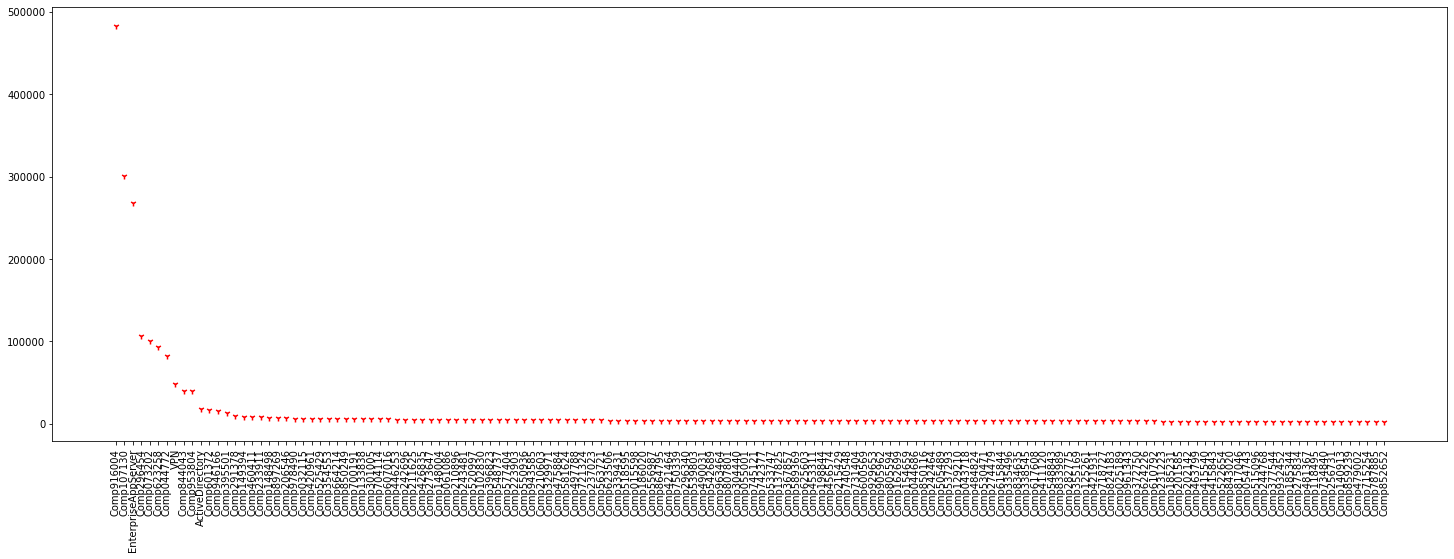

In [13]:
x=counts[1].loc[:,"SrcDevice"].head(150)
y=counts[1].loc[:,"Count"].head(150)

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,y,marker="1",c="Red")
plt.xticks(rotation=90)
plt.savefig("./plots/auth_counts/SrcDevice_Head_150.png")
plt.show()

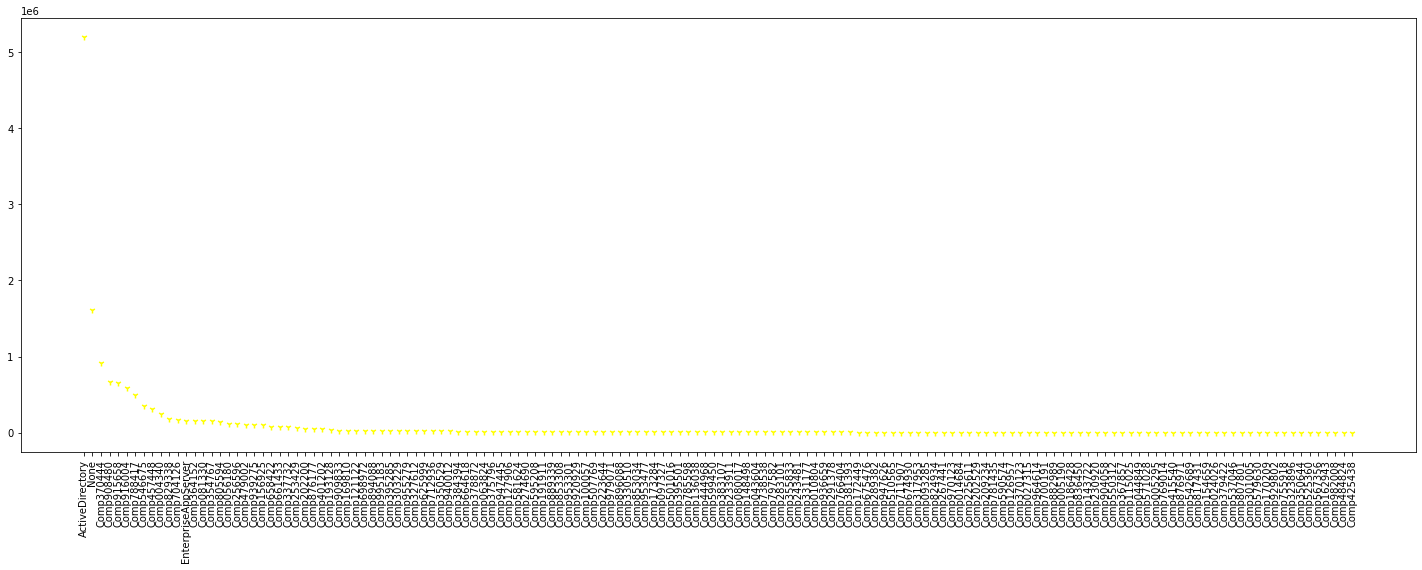

In [14]:
x=counts[2].loc[:,"DstDevice"].head(150)
y=counts[2].loc[:,"Count"].head(150)

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,y,marker="1",c="Yellow")
plt.xticks(rotation=90)
plt.savefig("./plots/auth_counts/DstDevice_Head_150.png")
plt.show()

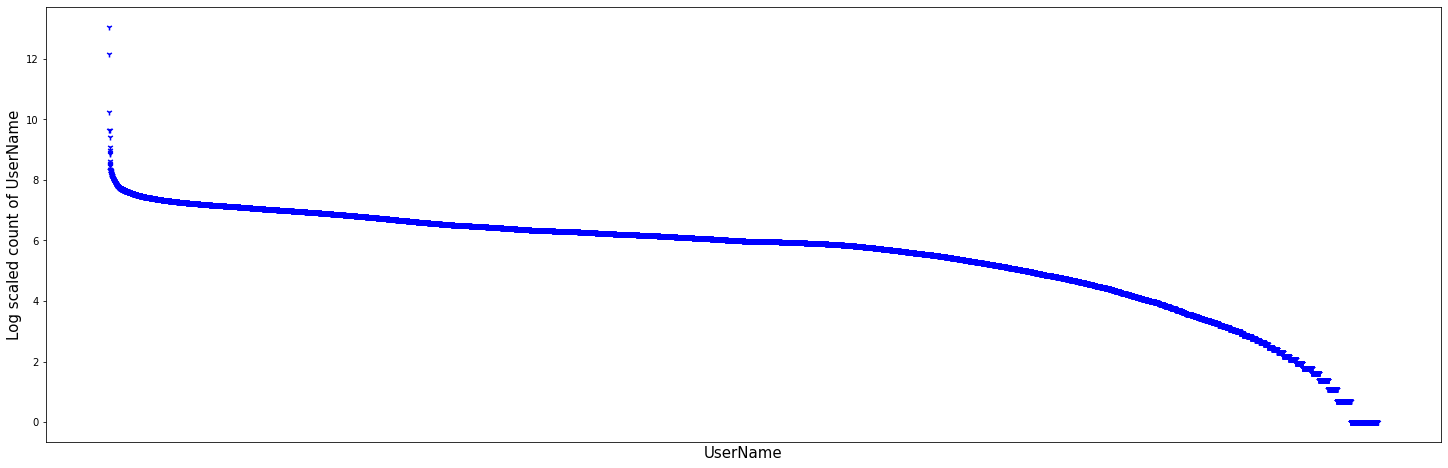

In [14]:
x=counts[0].loc[:,"UserName"]
y=counts[0].loc[:,"Count"]
z =[]
for i in y:
    z.append(log(i))

plt.rcParams["figure.figsize"] = (25,8)
plt.scatter(x,z,marker="1",c="Blue")
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.xticks(rotation=90)
plt.xlabel("UserName",fontsize=15)
plt.ylabel("Log scaled count of UserName",fontsize=15)
plt.savefig("../03 - Plots/auth_counts/UserNames_Full_logscale.png")
plt.show()

In [14]:
un = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/AuthUserNames.txt",header=None)
un = un[0].tolist()

In [16]:
df_a_mal = df_a[(df_a.UserName.isin(un)) | (df_a.SrcDevice.isin(un)) | (df_a.DstDevice.isin(un))]

In [17]:
colours = []
for j in range(0,4):
    colour = []
    boole = counts[j][counts[j].columns[0]].isin(list(df_a_mal[counts[j].columns[0]]))
    x=0
    for i in boole:
        #lis = list(df_p_mal[counts[j].columns[0]])
        if i == True:
            colour.append("r")
        else:
            colour.append("green")
        x=x+1
    colours.append(colour)

In [18]:
def square_plot_red_team(var,hed):
    plt.figure(figsize=(60,30))
    dtn()
    if var == 0:
        #counts2 = counts[0].copy()
        #counts2["UserName"] = np.where(counts2["Count"].between(0,counts2["Count"][3000]),"",counts2["UserName"])
        squarify.plot(sizes = counts[0]["Count"].head(hed), color = colours[0], alpha=.6, edgecolor="white")
    if var == 1:
        #counts2 = counts[1].copy()
        #counts2["Device"] = np.where(counts2["Count"].between(0,counts2["Count"][3000]),"",counts2["Device"])
        squarify.plot(sizes = counts[1]["Count"].head(hed), color = colours[1], alpha=.6, edgecolor="white")
    if var == 2:
        #counts2 = counts[2].copy()
        #counts2["ProcessName"] = np.where(counts2["Count"].between(0,counts2["Count"][250]),"",counts2["ProcessName"])
        squarify.plot(sizes = counts[2]["Count"].head(hed), color = colours[2], alpha=.6, edgecolor="white")
    if var == 3:
        #counts2 = counts[3].copy()
        #counts2["ParentProcessName"] = np.where(counts2["Count"].between(0,counts2["Count"][150]),"",counts2["ParentProcessName"])
        squarify.plot(sizes = counts[3]["Count"].head(hed),color = colours[3], alpha=.6, edgecolor="white")
    plt.title(str(var)+" counts relative to each other")
    plt.xticks(ticks = [])
    plt.yticks(ticks = [])
    if len(counts[var]["Count"].head(hed)) == len(counts[var]["Count"]):
        plt.savefig("./plots_last/"+str(counts[var].columns[0])+"_RedHighlight_Square_Complete.png")
    else:
        plt.savefig("./plots_last/"+str(counts[var].columns[0])+"_RedHighlight_Square_"+str(hed)+".png")
    gen_end()

In [19]:
for i in range(0,4):
    square_plot_red_team(i,len(counts[i]))
    plt.close()

Completed in :0:00:32.417308
Completed in :0:00:23.210562
Completed in :0:00:17.101031
Completed in :0:00:00.551105
